Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

    Haberman, S. J. (1976). Generalized Residuals for Log-Linear
    Models, Proceedings of the 9th International Biometrics
    Conference, Boston, pp. 104-122.
    Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
    Graphical Models for Assessing Logistic Regression Models (with
    discussion), Journal of the American Statistical Association 79:
    61-83.
    Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
    Department of Statistics, University of Wisconsin, Madison, WI.

Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute)
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 year

Missing Attribute Values: None

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
hman = pd.read_csv("haberman.csv")

In [21]:
print (hman.shape)

(306, 4)


In [22]:
hman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# Univariate Analysis:

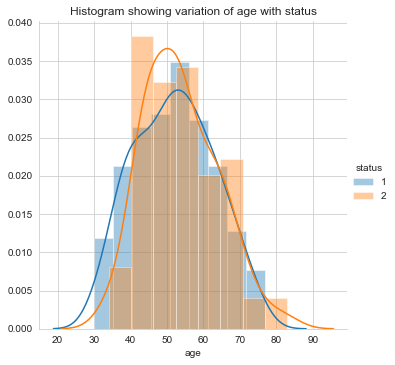

In [23]:
sns.FacetGrid(hman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram showing variation of age with status")
plt.show();

Analysis on Age ::
Age is not giving us a proper result on the categorizing of the data.


If the age of patient is less than 40 then probability of the survival of patient is high and if the age of patient is more than 64 then probability of its survival is almost equal.


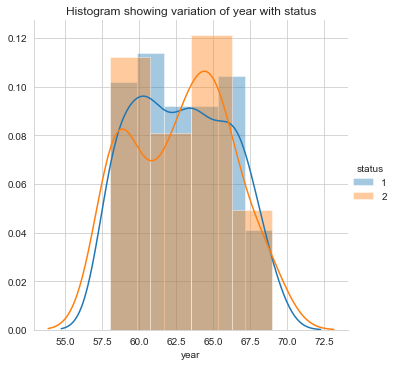

In [24]:
sns.FacetGrid(hman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram showing variation of year with status")
plt.show();

Analysis on year ::
Here also, we can see that histograph are super-imposed on each other that is we can not give any significant result on the basis of graph.

The patient survival is changes (fluctuate) significantly
in between 60 and 66.

         

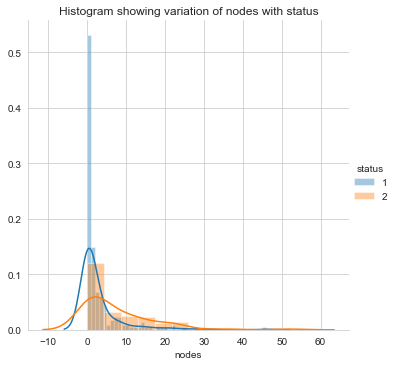

In [25]:
sns.FacetGrid(hman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram showing variation of nodes with status")
plt.show();

Analysis on nodes::
If the node value falls in between 0 to 4 then there is a high probability that patient will survive.

If the node value is greater than 6 then there is more probability that patient will die. 

On comparison of 4 to 6 there is more chance that patient will die. 


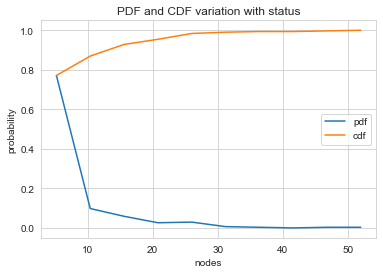

In [26]:
counts, bin_edges = np.histogram(hman['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.title("PDF and CDF variation with status")
plt.legend()
plt.show();



This graph gives the "pdf" and "cdf" graph. We have choosen node in the x axis because it is the best data point among age , year and node . So we have choosen the node probability graph.


In [27]:
print ("Means:: ")
print ("Mean age:")
print(np.mean(hman["age"]))
print ("Mean years:")
print(np.mean(hman["year"]))
print ("Mean nodes:")
print(np.mean(hman["nodes"]))

Means:: 
Mean age:
52.45751633986928
Mean years:
62.85294117647059
Mean nodes:
4.026143790849673


In [28]:
print ("Standard daviation:: ")
print ("std-div in age:")
print(np.std(hman["age"]))
print ("std-div in years:")
print(np.std(hman["year"]))
print ("std-div in nodes:")
print(np.std(hman["nodes"]))

Standard daviation:: 
std-div in age:
10.78578520363183
std-div in years:
3.244090833563246
std-div in nodes:
7.177896092811152


In [29]:
print ("Min And Max :: ")
print ("Min And Min age:")
print(np.min(hman["age"]))
print(np.max(hman["age"]))
print ("Min And Min year:")
print(np.min(hman["year"]))
print(np.max(hman["year"]))
print ("Min And Min nodes:")
print(np.min(hman["nodes"]))
print(np.max(hman["nodes"]))

Min And Max :: 
Min And Min age:
30
83
Min And Min year:
58
69
Min And Min nodes:
0
52


In [30]:
print("\nQuantiles:")
print(np.percentile(hman["age"],np.arange(0, 100, 25)))
print(np.percentile(hman["year"],np.arange(0, 100, 25)))
print(np.percentile(hman["nodes"], np.arange(0, 100, 25)))


Quantiles:
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]


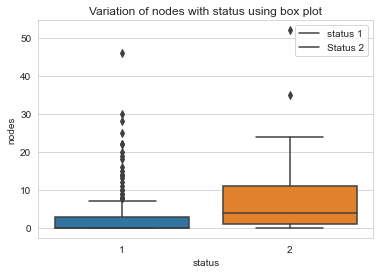

In [31]:
sns.boxplot(x='status',y='nodes', data=hman)
plt.legend(("status 1" , "Status 2"))
plt.title("Variation of nodes with status using box plot")
plt.show()

As we have noticed above that only "nodes" is a right parameter (among age and year) to do analysis on the dataset so here also we have choosen "Nodes status box plot" for our analysis.

On going through the box plot we can observe that there is sudden change in the box of status 2 which mean after the nodes changes to 4 there will be a large change in the deadth of the patients.

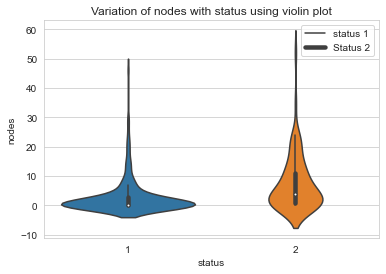

In [32]:
sns.violinplot(x="status", y="nodes", data=hman, size=8)
plt.legend(("status 1" , "Status 2"))
plt.title("Variation of nodes with status using violin plot")
plt.show()

Same as box plot , violin plot depicts the same and and here we have observed that there is a large spread in the status 1 plot this means that when the node is about 0 or 1 there is a great probability that the patient will survive.

# Bivariate Analysis

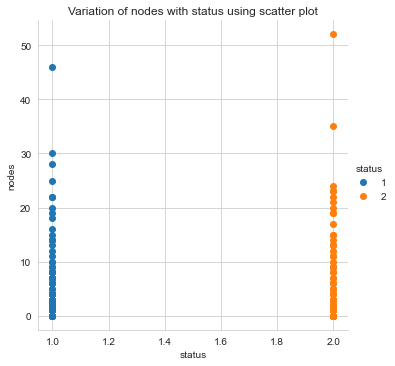

In [33]:
sns.set_style("whitegrid");
sns.FacetGrid(hman,hue="status", size=5) \
   .map(plt.scatter, "status", "nodes") \
   .add_legend();
plt.title("Variation of nodes with status using scatter plot")
plt.show();

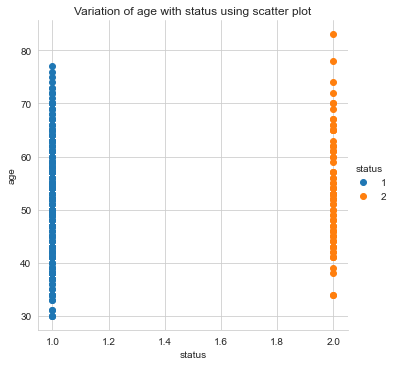

In [34]:
sns.set_style("whitegrid");
sns.FacetGrid(hman,hue="status", size=5) \
   .map(plt.scatter, "status", "age") \
   .add_legend();
plt.title("Variation of age with status using scatter plot")
plt.show();

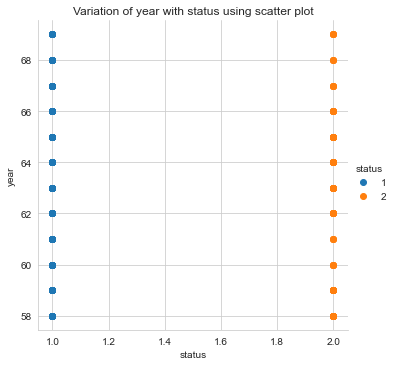

In [35]:
sns.set_style("whitegrid");
sns.FacetGrid(hman,hue="status", size=5) \
   .map(plt.scatter, "status", "year") \
   .add_legend();
plt.title("Variation of year with status using scatter plot")
plt.show();

All the pair plots are approximately same and there is no such observation is made. So we should start with pair-plots.

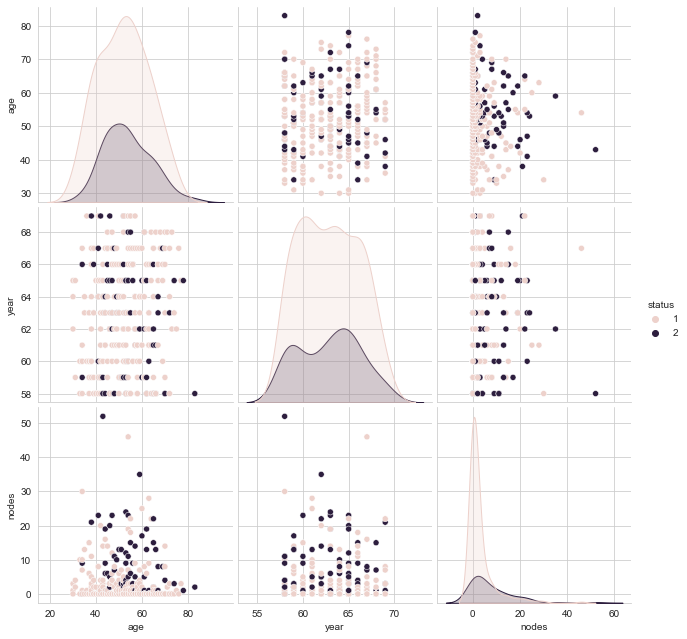

In [36]:
sns.set_style("whitegrid");
sns.pairplot(hman, hue="status", size=3);
plt.show()

Among all the pair plotsonly the "age node" plot is explainatory to some extent but in a big picture neither scatter plot nor pair plots are good for observation for this dataset because all the points are mixed in the plots and it is not possible to determine any conclusion from these plots.